In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn import metrics

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [52]:
df = pd.read_csv("diabetes.csv")

display(df.head())
display(df.tail())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [53]:
df.shape

(768, 9)

# Data Preprocessing

## Checking zeros

In [54]:
for i in df.columns:
    print(i,len(df[df[i] == 0]))

Pregnancies 111
Glucose 5
BloodPressure 35
SkinThickness 227
Insulin 374
BMI 11
DiabetesPedigreeFunction 0
Age 0
Outcome 500


**Observations:**

"Pregnancies" column may contain zeros as it will indicate no pregnancies. But Glucose, skinthickness, blood pressure, BMI, and Insulin can never be zero. So we have to change that all zeros to null values then we fill replace/remove null values.

### Replacing Zeros

In [55]:
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0,np.nan)
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

**Observations:**

We have successfully replace zeros with Nan in our required columns of dataset. Now we have to replace it using ffill or bfill method.

## Replacing Null values

In [56]:
df = df.fillna(method = 'ffill')
df = df.fillna(method = 'bfill')
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Outlier detection

C:\Users\Anuj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Anuj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Anuj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Anuj\anaconda3\lib\site-p

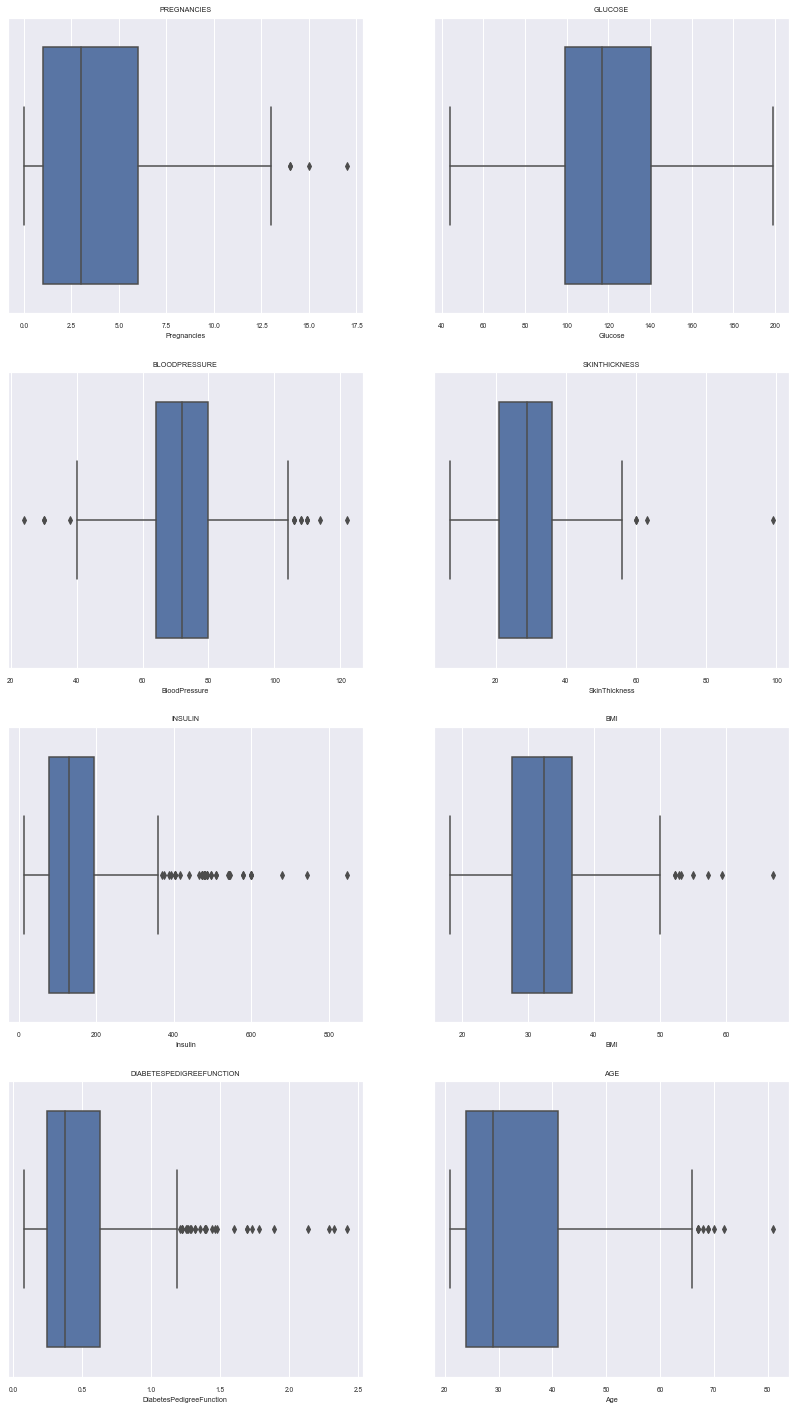

In [57]:
fig1, axes1 =plt.subplots(4,2,figsize=(14, 25))
list1_col= df.columns
for i in range(len(list1_col)-1):
    row=i//2
    col=i%2
    ax=axes1[row,col]
    sns.boxplot(df[list1_col[i]],ax=ax).set(title= list1_col[i].upper())

**Observations:**

Pregnancies can not be of 15 or 16 months hence there was outlier in "Pregnancies" column. Similarly there is outlier in "Insulin", "SkinThickness", "BMI", "DiabetesPedigreeFunction", and "Pregnancies" columns.

In [58]:
print(df.Insulin.shape)
print(df.SkinThickness.shape)
print(df.BMI.shape)
print(df.DiabetesPedigreeFunction.shape)
print(df.Pregnancies.shape)

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

df = df[~((df.iloc[:,4:5] < (Q1 - 1.5 * IQR)) |(df.iloc[:,4:5] > (Q3 + 1.5 * IQR))).any(axis=1)] #Insulin
df = df[~((df.iloc[:,3:4] < (Q1 - 1.5 * IQR)) |(df.iloc[:,3:4] > (Q3 + 1.5 * IQR))).any(axis=1)] #SkinThickness
df = df[~((df.iloc[:,5:6] < (Q1 - 1.5 * IQR)) |(df.iloc[:,5:6] > (Q3 + 1.5 * IQR))).any(axis=1)] #BMI
df = df[~((df.iloc[:,6:7] < (Q1 - 1.5 * IQR)) |(df.iloc[:,6:7] > (Q3 + 1.5 * IQR))).any(axis=1)] #DiabetesPedigreeFunction
df = df[~((df.iloc[:,0:1] < (Q1 - 1.5 * IQR)) |(df.iloc[:,0:1] > (Q3 + 1.5 * IQR))).any(axis=1)] #Pregnancies

print(df.Insulin.shape)
print(df.SkinThickness.shape)
print(df.BMI.shape)
print(df.DiabetesPedigreeFunction.shape)
print(df.Pregnancies.shape)

(768,)
(768,)
(768,)
(768,)
(768,)
Pregnancies                   5.0000
Glucose                      41.2500
BloodPressure                16.0000
SkinThickness                15.0000
Insulin                     114.5000
BMI                           9.2250
DiabetesPedigreeFunction      0.3825
Age                          17.0000
Outcome                       1.0000
dtype: float64
(687,)
(687,)
(687,)
(687,)
(687,)


C:\Users\Anuj\AppData\Local\Temp/ipykernel_2420/1596566951.py:12: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df.iloc[:,4:5] < (Q1 - 1.5 * IQR)) |(df.iloc[:,4:5] > (Q3 + 1.5 * IQR))).any(axis=1)] #Insulin
C:\Users\Anuj\AppData\Local\Temp/ipykernel_2420/1596566951.py:13: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df.iloc[:,3:4] < (Q1 - 1.5 * IQR)) |(df.iloc[:,3:4] > (Q3 + 1.5 * IQR))).any(axis=1)] #SkinThickness
C:\Users\Anuj\AppData\Local\Temp/ipykernel_2420/1596566951.py:14: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, r

In [59]:
df.shape

(687, 9)

C:\Users\Anuj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Anuj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Anuj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Anuj\anaconda3\lib\site-p

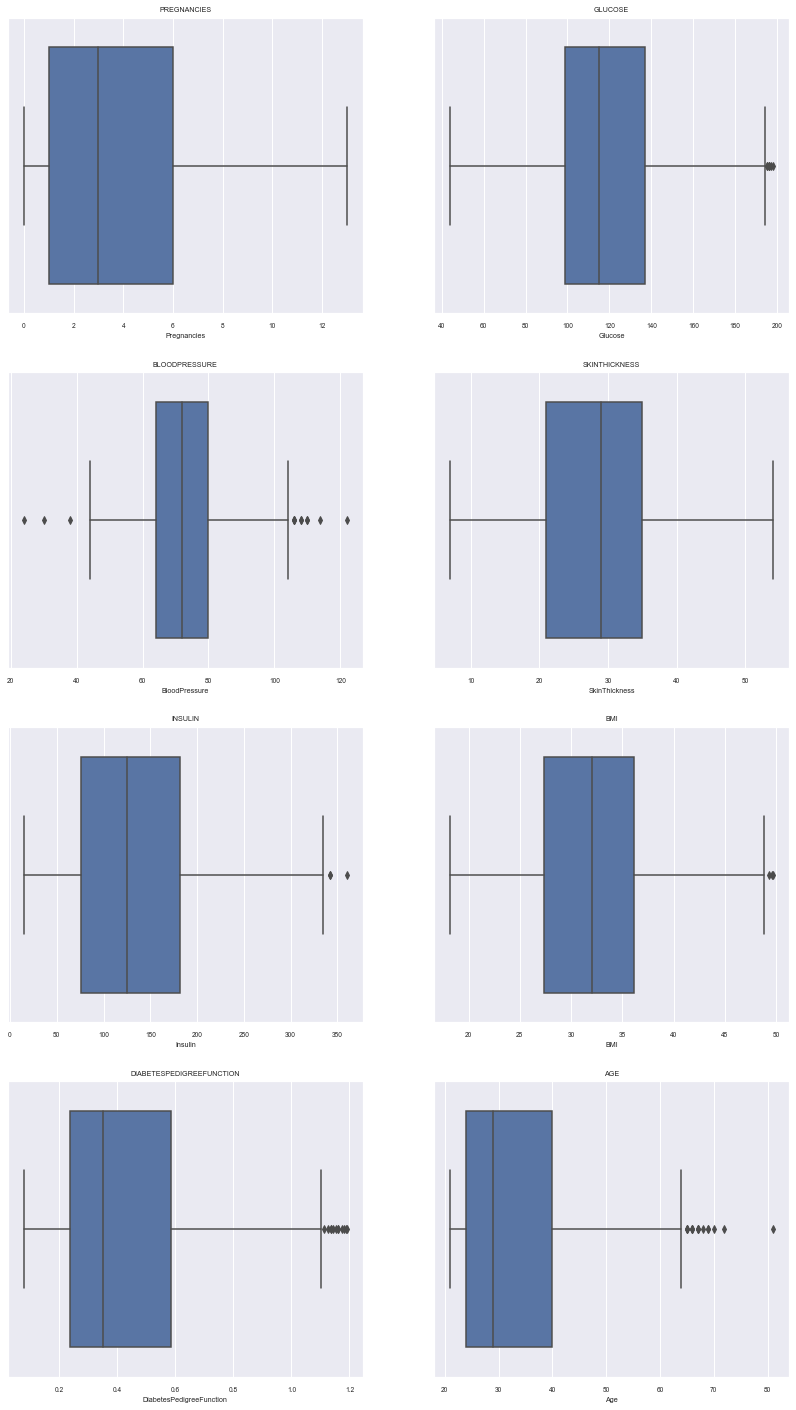

In [60]:
fig1, axes1 =plt.subplots(4,2,figsize=(14, 25))
list1_col= df.columns
for i in range(len(list1_col)-1):
    row=i//2
    col=i%2
    ax=axes1[row,col]
    sns.boxplot(df[list1_col[i]],ax=ax).set(title=list1_col[i].upper())

In [61]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000
mean,3.796215,119.294032,72.160116,28.720524,136.506550,32.027656,0.427544,33.080058,0.320233
std,3.274931,29.370127,12.129428,9.907763,74.747697,6.429451,0.248876,11.764117,0.466906
min,0.000000,44.000000,24.000000,7.000000,15.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,21.000000,76.000000,27.350000,0.238000,24.000000,0.000000
50%,3.000000,115.000000,72.000000,29.000000,125.000000,32.000000,0.351000,29.000000,0.000000
75%,6.000000,137.000000,80.000000,35.000000,182.000000,36.100000,0.586000,40.000000,1.000000
max,13.000000,198.000000,122.000000,54.000000,360.000000,49.700000,1.191000,81.000000,1.000000


# Data visualization

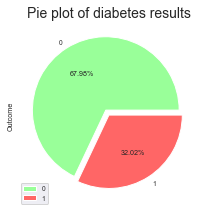

In [62]:
explode=(0.08,0)

df['Outcome'].value_counts().plot.pie(autopct='%1.2f%%',figsize=(3,3),explode=explode,colors=['#99ff99','#ff6666'])
plt.title("Pie plot of diabetes results", fontsize=14)
plt.tight_layout()
plt.legend()
plt.show()

<AxesSubplot:xlabel='Outcome', ylabel='count'>

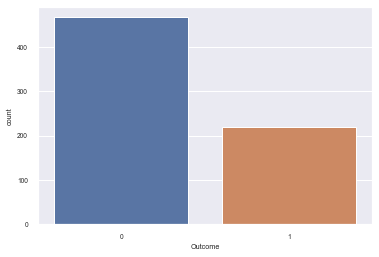

In [63]:
sns.countplot(x = "Outcome", data = df)

In [64]:
df.Outcome.value_counts()

0    467
1    220
Name: Outcome, dtype: int64

**Observations:**

There are 32.02% (220 peoples) people with diabetes and 67.98% (467 peoples) people who are not diagnosed with diabetes.

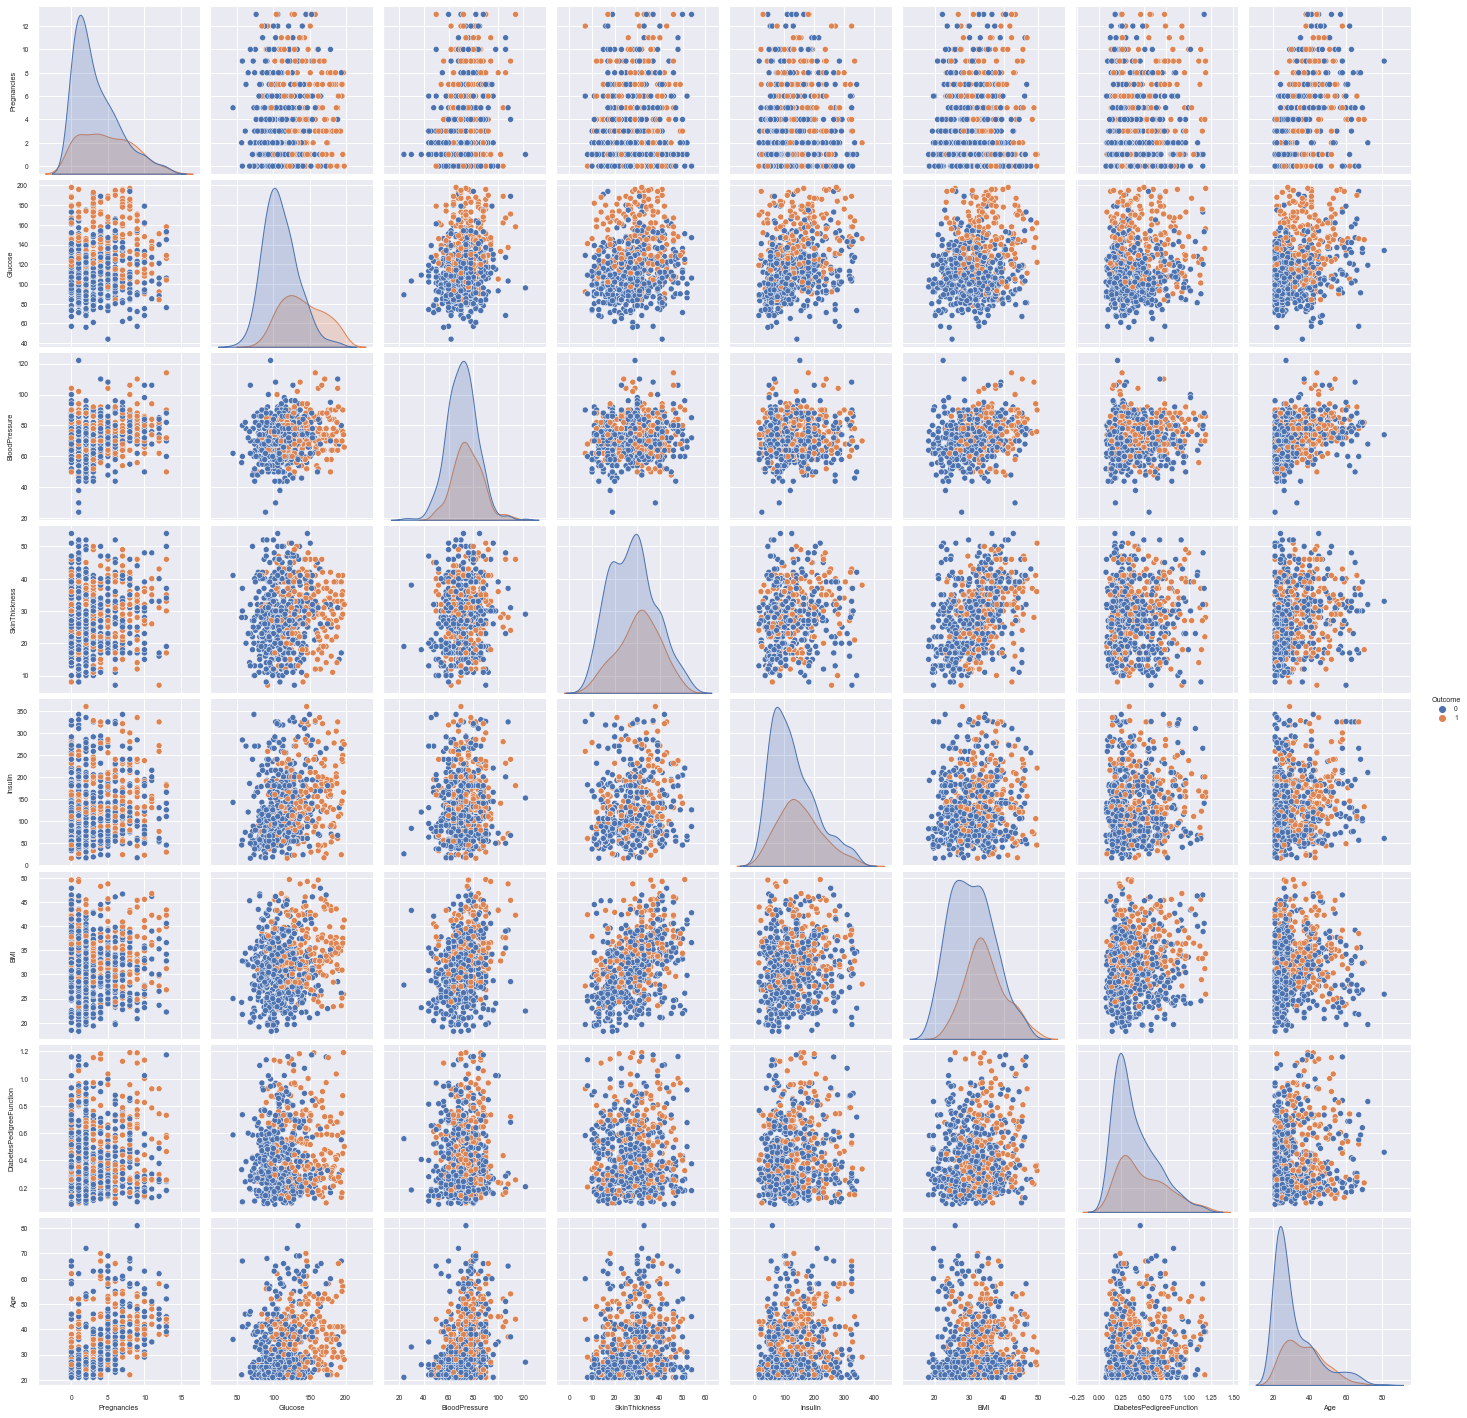

In [65]:
sns.pairplot(df, hue="Outcome", diag_kind="kde")

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

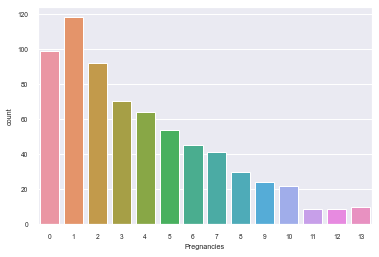

In [66]:
sns.countplot(x = "Pregnancies", data = df)

<AxesSubplot:xlabel='Age', ylabel='count'>

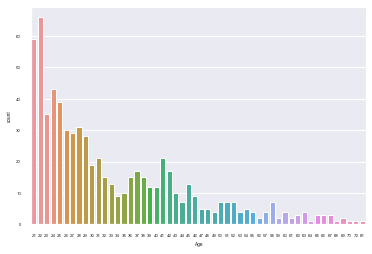

In [67]:
sns.set(font_scale = 0.4)
sns.countplot(x = "Age", data = df)

<AxesSubplot:>

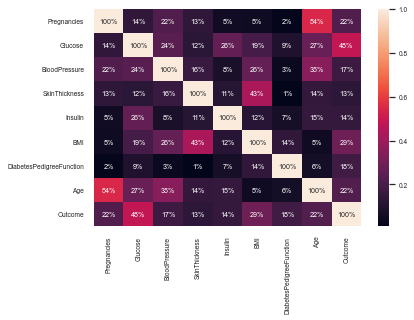

In [68]:
sns.set(font_scale=0.6)
sns.heatmap(df.corr(), annot=True, fmt = '.0%')

**Observations:**

- Outcome is 48% correlated with Glucose which is obvious as diabetes is highly dependent on glucose level in our blood.

- Also Age and pregnancies is also correlated by 54%. Below 18 age no one can become pregnant also not after 50 age so it is 54% dependent.

# Seperating Outcome column

In [69]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Scaling the data

- We are scaling the data here to improve performance of our model and to improve accuracy. This is one of the reason for scaling, another reason is that the Outcome of diabetes can be 1 or 0 while glucose level can be around 150 so it can be seen that outcome is of 1 digit while glucose level is of 3 digits which can decrease performance of our model so I am standardizing the data here.

In [70]:
scaler = StandardScaler()
features = scaler.fit_transform(X)
features

array([[ 0.67341572,  0.97809869, -0.01321028, ...,  0.24473151,
         0.80200964,  1.43931492],
       [-0.85444624, -1.16850084, -0.50823542, ..., -0.84480174,
        -0.3077845 , -0.17694262],
       [ 1.28456051,  2.17065398, -0.6732438 , ..., -1.35843885,
         0.98295434, -0.09187643],
       ...,
       [ 0.36784333,  0.05812746, -0.01321028, ..., -0.90706079,
        -0.73400979, -0.26200881],
       [-0.85444624,  0.2284925 , -1.00326056, ..., -0.30003512,
        -0.31582649,  1.18411636],
       [-0.85444624, -0.89591678, -0.17821866, ..., -0.25334084,
        -0.45254026, -0.85747211]])

# Splitting the data into train and test data

In [71]:
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.3, random_state=42)

In [72]:
df.shape

(687, 9)

# Keras Model

In [77]:
model = Sequential()

# add first hidden layer
model.add(Dense(32, input_dim=8, activation='relu'))

# Second hidden layer
model.add(Dense(16,activation='relu'))

# Adding Dropout to avoid overfitting
model.add(Dropout(0.25))

# Output layer
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 32)                288       
_________________________________________________________________
dense_27 (Dense)             (None, 16)                528       
_________________________________________________________________
dropout_6 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 17        
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________


In [78]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [79]:
# Training for 200 epochs
model.fit(X_train,y_train,epochs=200)

Epoch 1/200
15/15 [==============================] - 0s 1ms/step - loss: 0.7009 - accuracy: 0.5271
Epoch 2/200
15/15 [==============================] - 0s 1ms/step - loss: 0.6397 - accuracy: 0.6542
Epoch 3/200
15/15 [==============================] - 0s 763us/step - loss: 0.5895 - accuracy: 0.7188
Epoch 4/200
15/15 [==============================] - 0s 340us/step - loss: 0.5510 - accuracy: 0.7500
Epoch 5/200
15/15 [==============================] - 0s 626us/step - loss: 0.5325 - accuracy: 0.7604
Epoch 6/200
15/15 [==============================] - 0s 861us/step - loss: 0.5024 - accuracy: 0.7646
Epoch 7/200
15/15 [==============================] - 0s 1ms/step - loss: 0.4873 - accuracy: 0.7875
Epoch 8/200
15/15 [==============================] - 0s 1ms/step - loss: 0.4720 - accuracy: 0.7729
Epoch 9/200
15/15 [==============================] - 0s 1ms/step - loss: 0.4581 - accuracy: 0.8000
Epoch 10/200
15/15 [==============================] - 0s 1ms/step - loss: 0.4530 - accuracy: 0.8000
E

15/15 [==============================] - 0s 893us/step - loss: 0.3520 - accuracy: 0.8562
Epoch 83/200
15/15 [==============================] - 0s 743us/step - loss: 0.3400 - accuracy: 0.8625
Epoch 84/200
15/15 [==============================] - 0s 400us/step - loss: 0.3408 - accuracy: 0.8625
Epoch 85/200
15/15 [==============================] - 0s 851us/step - loss: 0.3566 - accuracy: 0.8500
Epoch 86/200
15/15 [==============================] - 0s 1ms/step - loss: 0.3506 - accuracy: 0.8375
Epoch 87/200
15/15 [==============================] - 0s 1ms/step - loss: 0.3445 - accuracy: 0.8667
Epoch 88/200
15/15 [==============================] - 0s 495us/step - loss: 0.3463 - accuracy: 0.8458
Epoch 89/200
15/15 [==============================] - 0s 556us/step - loss: 0.3523 - accuracy: 0.8604
Epoch 90/200
15/15 [==============================] - 0s 1ms/step - loss: 0.3347 - accuracy: 0.8771
Epoch 91/200
15/15 [==============================] - 0s 1ms/step - loss: 0.3210 - accuracy: 0.8646
E

15/15 [==============================] - 0s 542us/step - loss: 0.2921 - accuracy: 0.8938
Epoch 163/200
15/15 [==============================] - 0s 959us/step - loss: 0.2821 - accuracy: 0.8917
Epoch 164/200
15/15 [==============================] - 0s 1ms/step - loss: 0.2774 - accuracy: 0.8875
Epoch 165/200
15/15 [==============================] - 0s 622us/step - loss: 0.2681 - accuracy: 0.8938
Epoch 166/200
15/15 [==============================] - 0s 417us/step - loss: 0.2818 - accuracy: 0.8938
Epoch 167/200
15/15 [==============================] - 0s 940us/step - loss: 0.2819 - accuracy: 0.9021
Epoch 168/200
15/15 [==============================] - 0s 1ms/step - loss: 0.2982 - accuracy: 0.8896
Epoch 169/200
15/15 [==============================] - 0s 940us/step - loss: 0.2826 - accuracy: 0.8917
Epoch 170/200
15/15 [==============================] - 0s 379us/step - loss: 0.2912 - accuracy: 0.8833
Epoch 171/200
15/15 [==============================] - 0s 1ms/step - loss: 0.2796 - accurac

In [80]:
# Train and Test accuracy
scores = model.evaluate(X_train,y_train)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = model.evaluate(X_test,y_test)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

15/15 [==============================] - 0s 707us/step - loss: 0.2365 - accuracy: 0.9125
Training Accuracy: 91.25%

7/7 [==============================] - 0s 2ms/step - loss: 0.6056 - accuracy: 0.7391
Testing Accuracy: 73.91%



# ROC Curve

Text(0, 0.5, 'True Positive Rate')

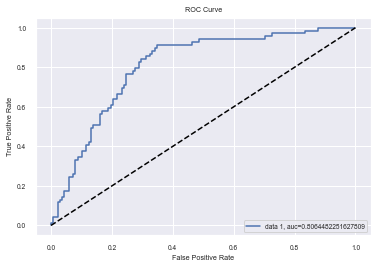

In [94]:
y_test_pred_probs = model.predict(X_test)
FPR, TPR, _ = roc_curve(y_test,y_test_pred_probs)

auc = metrics.roc_auc_score(y_test, y_test_pred_probs)
auc

plt.plot(FPR,TPR,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.plot([0,1],[0,1],'--',color='black')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')